## Imports and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from os.path import exists, dirname
import os, sys
import numpy as np
import seaborn as sns
import json
import yaml
import pickle

path = '/Users/ymdt/src/dreem_nap/'
sys.path.append(path)
from dreem_nap.manipulator import Manipulator
from dreem_nap.study import Study, util

# Config
path_to_data= '/Users/ymdt/src/data/Lauren'
path_to_studies= '/Users/ymdt/src/data/Lauren/studies.csv'
min_cov_bases= 1000
mpl.rcParams['figure.dpi'] = 100 # the highest the resolution, the slowest the plotting
#mpl.use('agg')

studies = Study.load_studies(path_to_studies)
study = Study.from_dict(studies['3UTR_v_5UTR'].__dict__)
study.load_df_from_local_files(path_to_data= path_to_data, min_cov_bases = min_cov_bases, filter_by='study')
study.get_df().head()

/Users/ymdt/src/dreem_nap/venv-nap/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 628/628 [00:00<00:00, 22415.69construct filtered/s, sample:472]


341 constructs found across all samples for study 3UTR_v_5UTR.


,samp,construct,sequence,structure,data_type,num_reads,num_aligned,num_of_mutations,mut_bases,info_bases,...,skips_short_read,skips_too_many_muts,mod_bases_A,mod_bases_C,mod_bases_G,mod_bases_T,cluster,mut_rates,worst_cov_bases,min_cov_bases
0,470,3114-O-flank_1=hp7-DB,TTAAACCGGCCAACATACCGCATATGAGGATCACCCATATGCTCGC...,......(((........)))((((((.((....))))))))...((...,DMS,2028,2017,"[466, 590, 423, 196, 82, 20, 5, 11, 5, 2, 0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1806.0, 1936.0, 1948.0, 2000.0, 2008.0, 2010....",...,0,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000...",1792.0,1000
2,470,3091-CC-flank_1=hp5-DB,TTAAACCGGCCAACATACCGCATATGAGGATCACCCATATGCTCGC...,......(((........)))((((((.((....))))))))...((...,DMS,2800,2797,"[722, 818, 574, 254, 86, 30, 8, 7, 2, 3, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[2545.0, 2686.0, 2700.0, 2784.0, 2792.0, 2793....",...,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00035790...",2361.0,1000
3,470,3124-O-flank_1=hp7-DB,TTAAACCGGCCAACATACCGCATATGAGGATCACCCATATGCTCCG...,......(((........)))((((((.((....))))))))........,DMS,2790,2700,"[587, 670, 566, 341, 143, 56, 18, 7, 3, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[2388.0, 2530.0, 2550.0, 2596.0, 2605.0, 2607....",...,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003834355828...",2328.0,1000
4,470,3546-O-flank_1=bi4-rre-DB,TTAAACCGGCCAACATACCGCATATGAGGATCACCCATATGCTCCG...,......(((........)))((((((.((....))))))))...((...,DMS,1471,1468,"[307, 423, 324, 182, 84, 22, 6, 5, 3, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1342.0, 1414.0, 1424.0, 1455.0, 1460.0, 1461....",...,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1327.0,1000
7,470,3136-O-flank_1=hp8-DB,TTAAACCGGCCAACATACCGCATATGAGGATCACCCATATGCTCCA...,............((((.(((((((((.((....))))))))).......,DMS,2330,2329,"[530, 639, 502, 275, 126, 26, 6, 2, 1, 0, 0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2126.0, 2254.0, 2270.0, 2309.0, 2314.0, 2316....",...,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2115.0,1000


## Data quality analysis
- random plots base coverage
- valid constructs per sample
- valid constructs across all samples

In [2]:
# TODO

## Clustering
### Hyperparameters

In [3]:
metric = 'euclidean' # can be 'euclidean', 'r2', 'spearman'
base_type=['A','C']
show = {
    'sequence_picture': True,
    'hierarchical_dendrogram': True,
    'construct_vs_sequence_heatmap': True,
    'construct_vs_construct_heatmap': True
}

### Utils

In [4]:
def make_dendrograms_for_study(study, metric, index, index_name, base_type, show):
    if show['hierarchical_dendrogram']:
        out = study.plot.dendrogram(samp=study.samples, index=index, metric=metric, base_type = base_type, figsize=(10,100), dpi=300, p=100)#, title='Hierarchical clustering of the MS2 hairpin')    
        prefix = util.make_path(f'../data/figs/date/Lauren/dendrogram/')+f'{study.samples}_{index_name}_{metric}'
        out.fig.savefig(prefix+'.png')
    
        with open(prefix+'.txt', 'w') as f:
            for item in out.labels:
                f.write(item+'\n')
            f.close()


### Replicates 

In [5]:
# TODO

### Flanks

In [6]:
# TODO

### MS2
- show picture
- hierarchical clustering dendrogram
- construct vs sequence heatmap using clustering order
- construct vs construct heatmap using clustering order

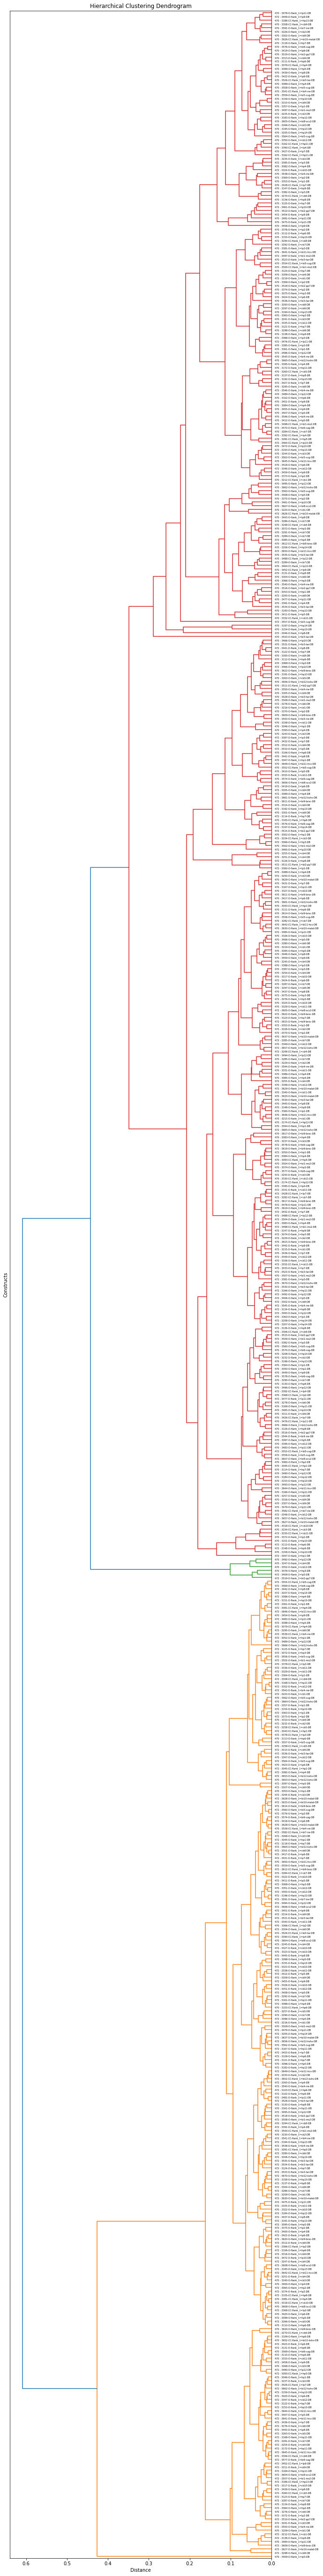

In [7]:
ms2_idx = list(range(19,42))
make_dendrograms_for_study(study, metric, ms2_idx, 'MS2', base_type, show)

### LAH
- show picture
- hierarchical clustering dendrogram
- construct vs sequence heatmap using clustering order
- construct vs construct heatmap using clustering order

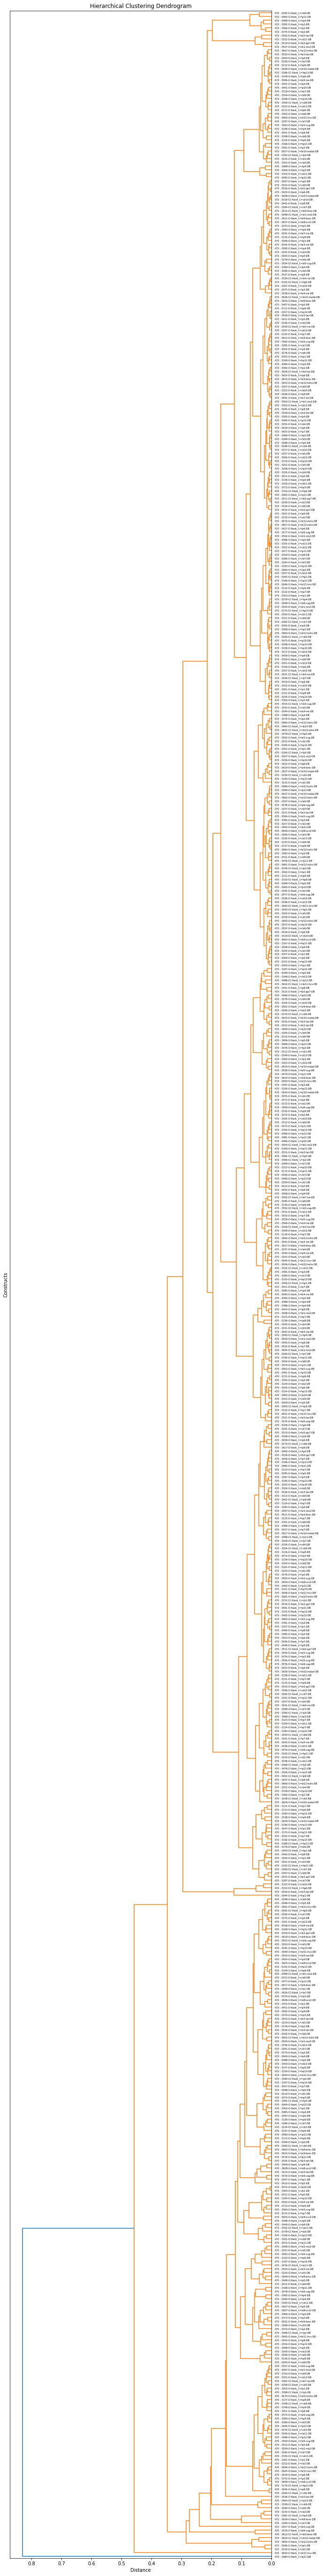

In [8]:
lah_idx = 'CACAGTCGAAAGACTGTG'
make_dendrograms_for_study(study, metric, lah_idx, 'LAH', base_type, show)

### MS2 + LAH
- show picture
- hierarchical clustering dendrogram
- construct vs sequence heatmap using clustering order
- construct vs construct heatmap using clustering order

In [9]:
# TODO